## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


Text(0, 0.5, 'f(x)')

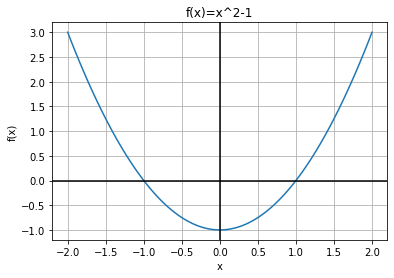

In [2]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


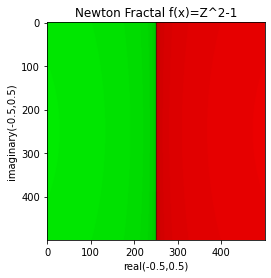

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


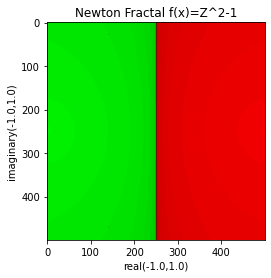

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


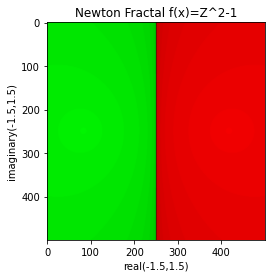

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


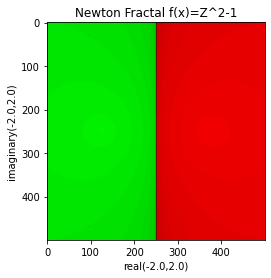

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


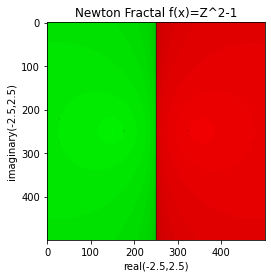

In [3]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


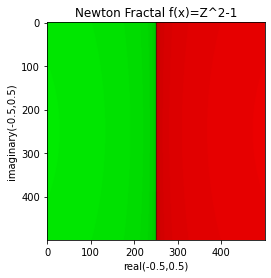

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


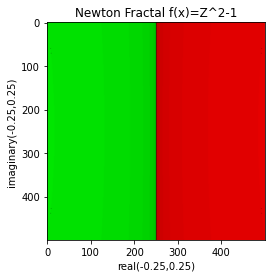

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


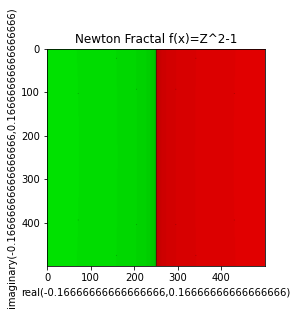

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


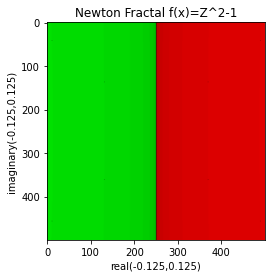

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


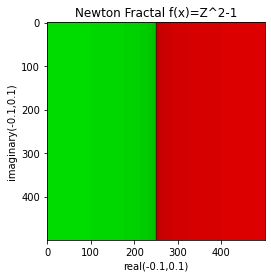

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


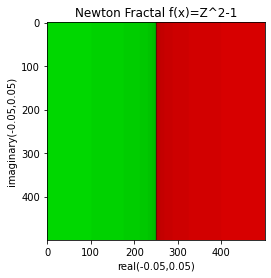

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


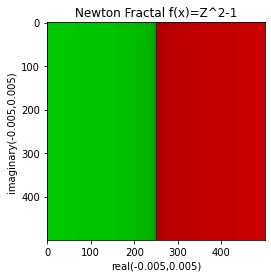

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


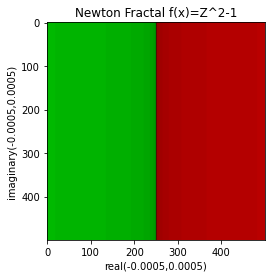

In [4]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Newton iterates form z=10.0 + 0.0j

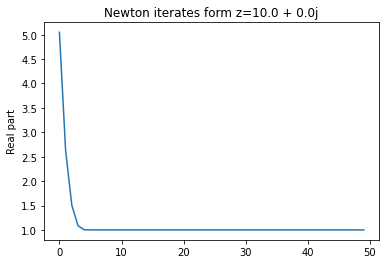

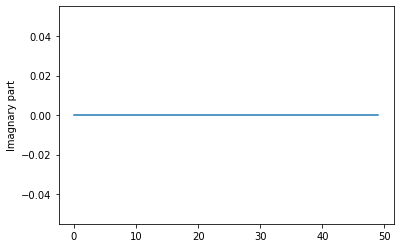

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

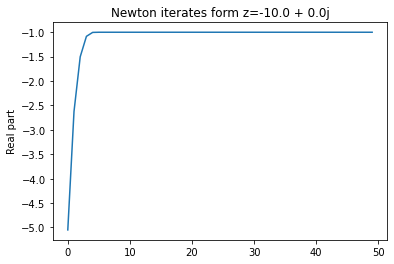

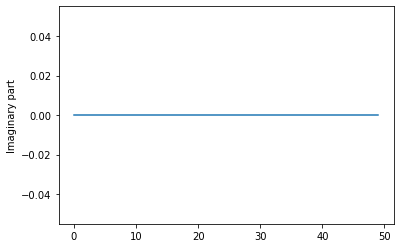

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

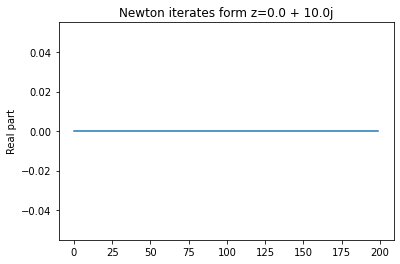

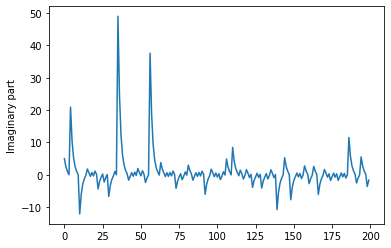

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

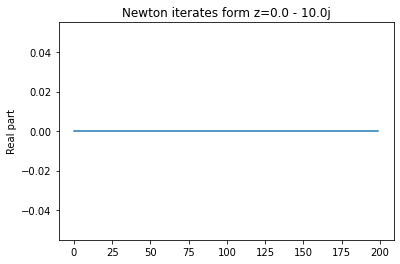

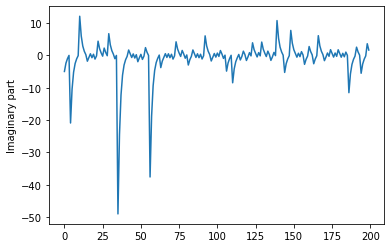

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 0.0j

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

#Laboratiorio 6

###Cesar David Pineda Osorio

#####1. Plot the following functions in a x range that include the vertex and the roots (if there are roots)

- x^2
- (x-1)^2
- x^2 – 1
- x^2+ 1

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np

def plotFunction(titlePlot, function, x):
  fig, ax = plt.subplots()
  ax.plot(x,function)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(titlePlot)
  plt.xlabel('x')
  plt.ylabel('f(x)')

#1. x^2


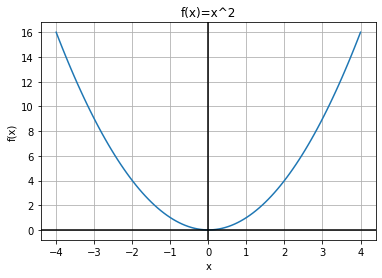

In [20]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
x = np.linspace(-4.0,4.0,100)
plotFunction('f(x)=x^2', f(x), x)

# 2. (x-1)^2

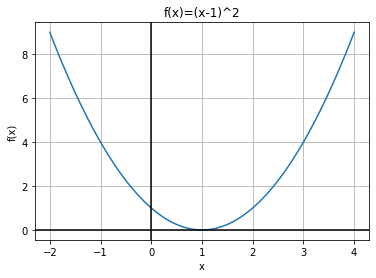

In [21]:
def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * (z-1)

x = np.linspace(-2.0,4.0,100)
plotFunction('f(x)=(x-1)^2', f(x), x)

#3. x^2 - 1

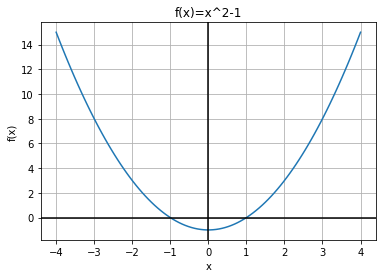

In [22]:
def f(z):
    return z**2-1

def df(z):
    return 2*z

x = np.linspace(-4.0,4.0,100)
plotFunction('f(x)=x^2-1', f(x), x)

#4. x^2 + 1


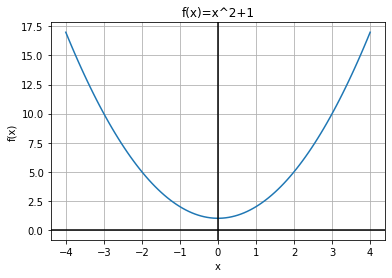

In [23]:
def f(z):
    return z**2+1

def df(z):
    return 2*z

x = np.linspace(-4.0,4.0,100)
plotFunction('f(x)=x^2+1', f(x), x)

#####2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations
- x^2 = 0
- (x-1)^2 = 0
- x^2 – 1 = 0
- x^2+ 1 = 0

#### Classic


In [26]:
def quadraticSolutionClassic(a,b,c):
  discriminant = b**2 - 4 * a * c
  if (discriminant >= 0):
      if (discriminant == 0):
          x = -b / (2 * a)
          print("The only root using Classic method is {:.3f}".format(x))
      else:
          x1 = (-b + math.sqrt(discriminant)) / (2 * a)
          x2 = (-b - math.sqrt(discriminant)) / (2 * a)
          print("The real root x1 using Classic method  is {:.3f}".format(x1))
          print("The real root x2 using Classic method  is {:.3f}".format(x2))
  else:
    discriminant = abs(discriminant)
    realPart = -b / (2 * a)
    imaginaryPart = math.sqrt(discriminant) / (2 * a)
    print("The complex root x1 using Classic method  is {:.3f} + {:.3f}i".format(realPart, imaginaryPart))
    print("The complex root x2 using Classic method  is {:.3f} - {:.3f}i".format(realPart, imaginaryPart))

####Po Shen Loh

In [25]:
from sympy import *

u = Symbol('u')

def poshenloh(a,b,c):
    b1 = b/a
    c1 = c/a
    a1 = a/a
    firstPart = -b1/2 - u
    secondPart = -b1/2 + u
    C = expand(firstPart * secondPart)
    D = -1*C
    solveU = D+c1
    arraySol = solve(solveU,u)
    if len(arraySol) == 1:
      x1 = -b1/2 + arraySol[0]
      return print("The only root using Po Shen Loh method is {}".format(x1))
    else:
      x1 = -b1/2 + arraySol[1]
      x2 = -b1/2 + arraySol[0]
      return print("The first root using Po Shen Loh method is {} \nThe second root using Po Shen Loh method is {}".format(x1,x2))

In [29]:
print ("For x^2 = 0: ")
quadraticSolutionClassic(1,0,0)
poshenloh(1,0,0)
print ("For (x-1)^2 = 0 or x^2 - 2x + 1: ")
quadraticSolutionClassic(1,-2,1)
poshenloh(1,-2,1)
print ("For x^2 – 1 = 0: ")
quadraticSolutionClassic(1,0,-1)
poshenloh(1,0,-1)
print ("For x^2 + 1 = 0: ")
quadraticSolutionClassic(1,0,1)
poshenloh(1,0,1)

For x^2 = 0: 
The only root using Classic method is 0.000
The only root using Po Shen Loh method is 0
For (x-1)^2 = 0 or x^2 - 2x + 1: 
The only root using Classic method is 1.000
The only root using Po Shen Loh method is 1.00000000000000
For x^2 – 1 = 0: 
The real root x1 using Classic method  is 1.000
The real root x2 using Classic method  is -1.000
The first root using Po Shen Loh method is 1.00000000000000 
The second root using Po Shen Loh method is -1.00000000000000
For x^2 + 1 = 0: 
The complex root x1 using Classic method  is 0.000 + 1.000i
The complex root x2 using Classic method  is 0.000 - 1.000i
The first root using Po Shen Loh method is 1.0*I 
The second root using Po Shen Loh method is -1.0*I


#####3. to plot the newton fractals for the corresponding complex quadratic polynomials
- z^2
- (z - 1)^2 
- z^2 – 1
- z^2 + 1



#1. z^2

In [36]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom in
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


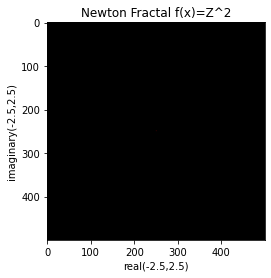

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


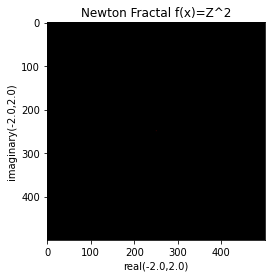

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


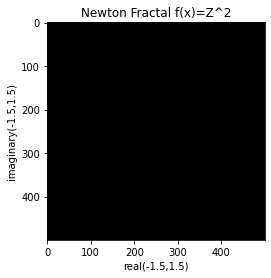

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


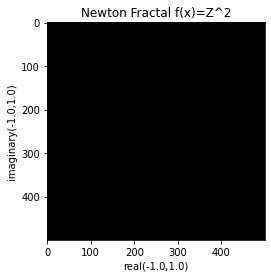

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


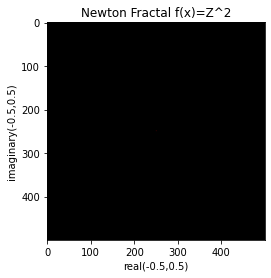

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


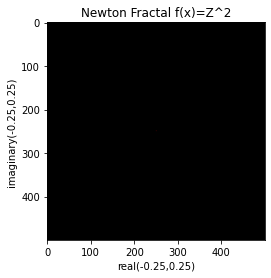

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


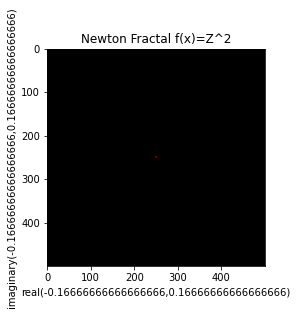

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


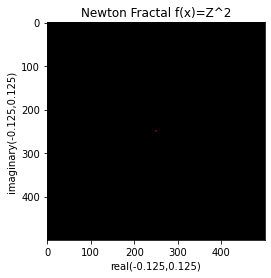

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


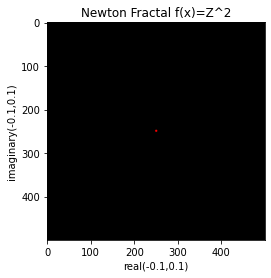

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


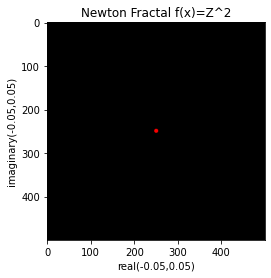

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


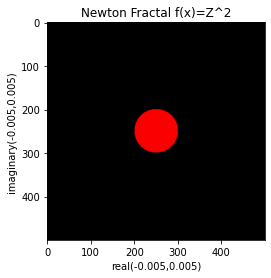

Z region from ( -0.001 , -0.001 ) to ( 0.001 , 0.001 )


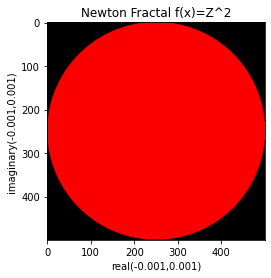

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


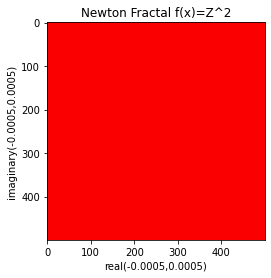

In [37]:
print("Zoom")
display1(zoom=5)
display1(zoom=4)
display1(zoom=3)
display1(zoom=2)
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(z_c_r = 0,zoom=1/100)
display1(z_c_r = 0,zoom=1/500)
display1(zoom=1/1000)

#2. (z-1)^2 

Zoom
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


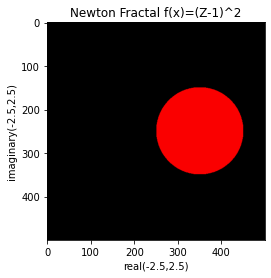

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


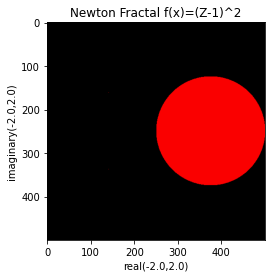

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


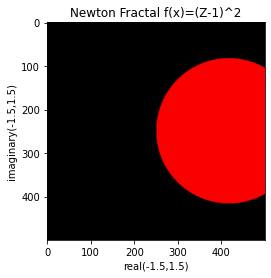

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


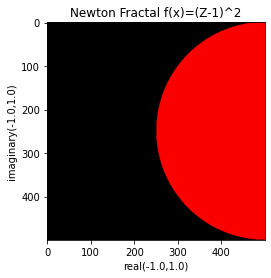

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


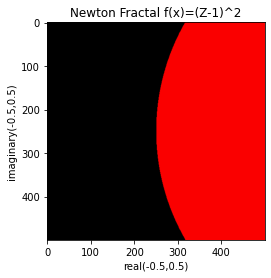

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


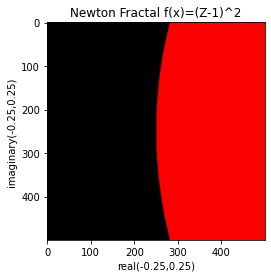

Z region from ( 0.8333333333333334 , -0.16666666666666666 ) to ( 1.1666666666666667 , 0.16666666666666666 )


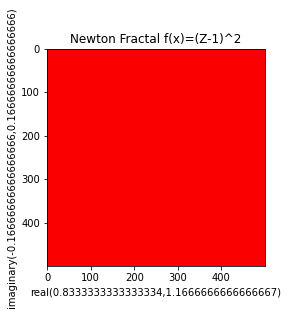

Z region from ( 0.875 , -0.125 ) to ( 1.125 , 0.125 )


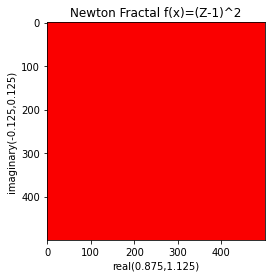

Z region from ( 0.9 , -0.1 ) to ( 1.1 , 0.1 )


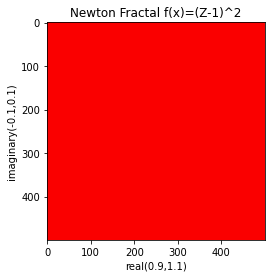

Z region from ( 0.95 , -0.05 ) to ( 1.05 , 0.05 )


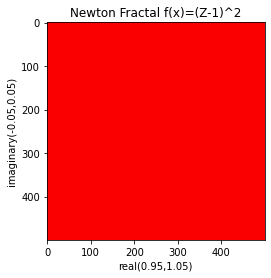

Z region from ( 0.995 , -0.005 ) to ( 1.005 , 0.005 )


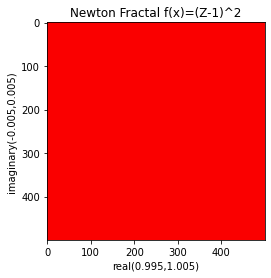

Z region from ( 0.999 , -0.001 ) to ( 1.001 , 0.001 )


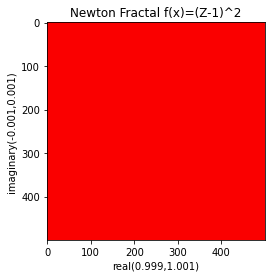

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


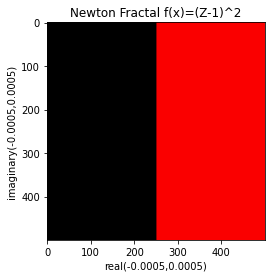

In [38]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z - 2 

def newton_set2(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1 # max error allowed

    # Bounding roots
    r1 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display2(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set2(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

print("Zoom")
display2(zoom=5)
display2(zoom=4)
display2(zoom=3)
display2(zoom=2)
display2(zoom=1)
display2(zoom=1/2)
display2(z_c_r = 1,zoom=1/3)
display2(z_c_r = 1,zoom=1/4)
display2(z_c_r = 1,zoom=1/5)
display2(z_c_r = 1,zoom=1/10)
display2(z_c_r = 1,zoom=1/100)
display2(z_c_r = 1,zoom=1/500)
display2(zoom=1/1000)

##4. z^2 + 1 

Zoom
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


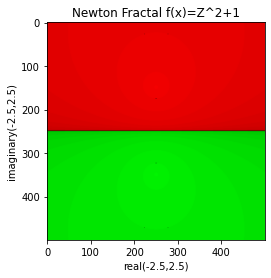

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


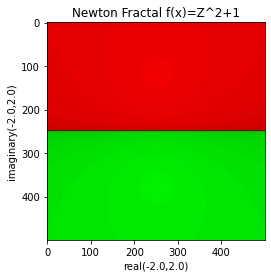

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


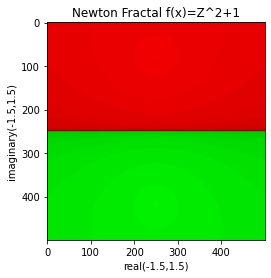

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


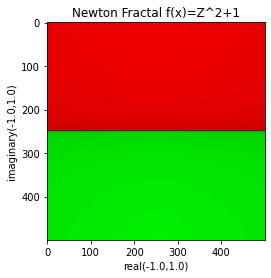

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


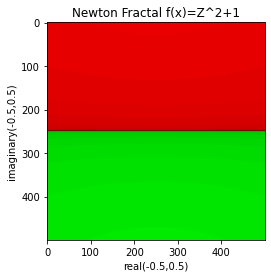

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


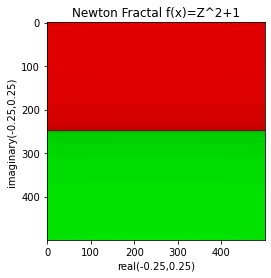

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


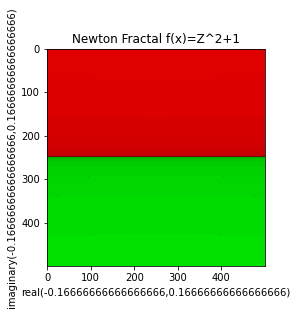

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


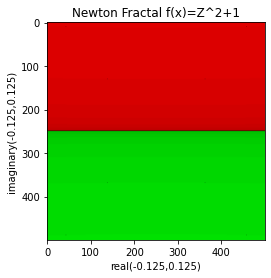

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


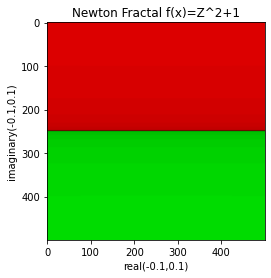

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


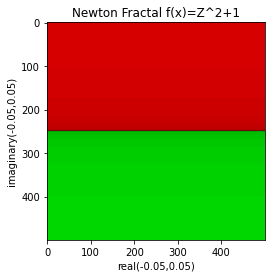

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


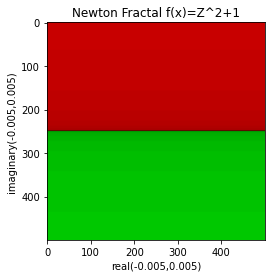

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


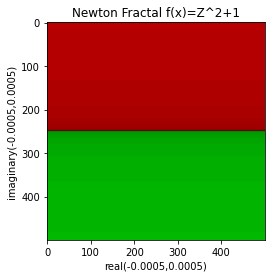

In [39]:
def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z

def newton_set3(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0,1)
    r2 = complex(0,-1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display3(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set3(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2+1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

print("Zoom")
display3(zoom=5)
display3(zoom=4)
display3(zoom=3)
display3(zoom=2)
display3(zoom=1)
display3(zoom=1/2)
display3(zoom=1/3)
display3(zoom=1/4)
display3(zoom=1/5)
display3(zoom=1/10)
display3(zoom=1/100)
display3(zoom=1/1000)

#####4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

##1. z^2
###Newton iterates from z = 10.0 + 0.0j

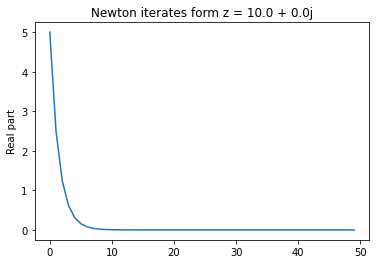

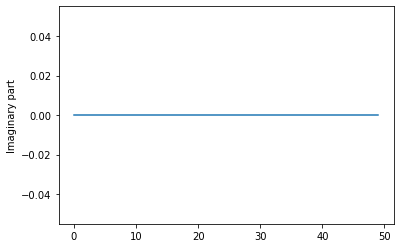

In [41]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = 10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = -10.0 + 0.0j

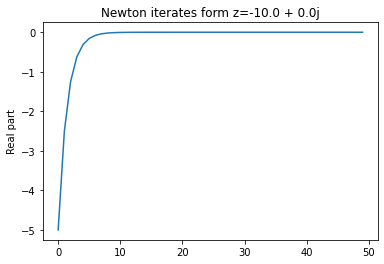

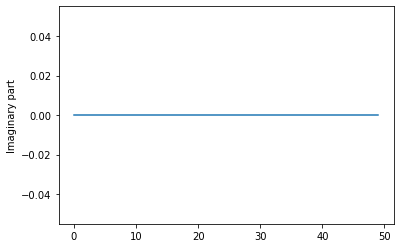

In [42]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = 0.0 + 10.0j

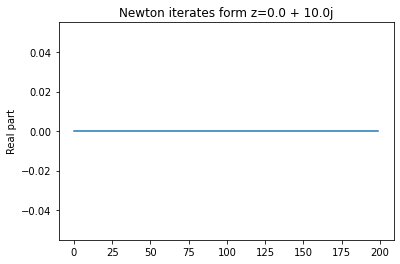

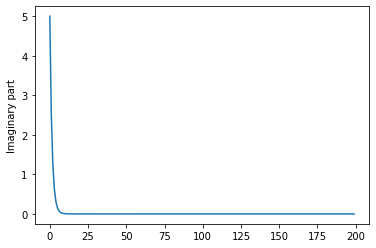

In [43]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = 0.0 + 0.0j

In [44]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

##Se concluye lo siguiente:

- Iteración 1: Hay un decrecimiento en la parte real de z^2 que tiende a cero ya que su única raíz tiene como posición el cero. La recta imaginaria está en 0 debido a que no tiene raices imaginarias.
- Iteración 2: Ocurre el mismo fenomento que en la iteración 1; se manteine la tendencia hacia cero.
- Iteración 3: Se confirma las solucion del punto 2 con la convergencia hacia 0.
- Iteración 4: Se confirma las solucion del punto 2 con la convergencia hacia 0.
- Iteración 5: La función diverge lo que nos dá un error.

##2. (z-1)^2
###Newton iterates form z = 10.0 + 0.0j

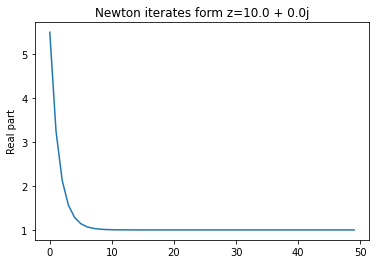

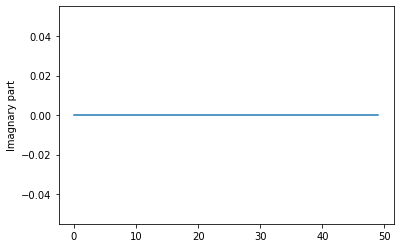

In [45]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = -10.0 + 0.0j

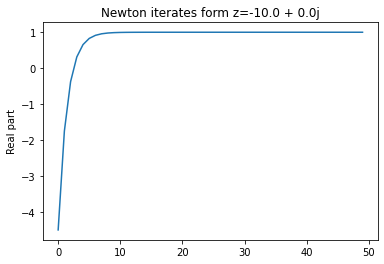

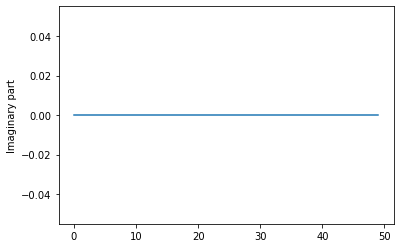

In [46]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z=0.0 + 10.0j

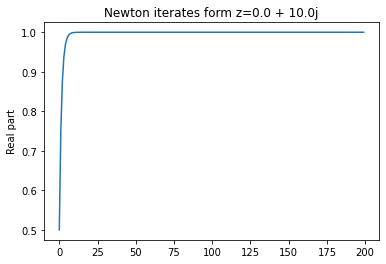

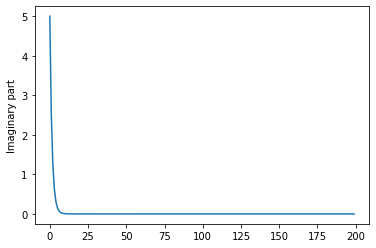

In [47]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z=0.0 - 10.0j

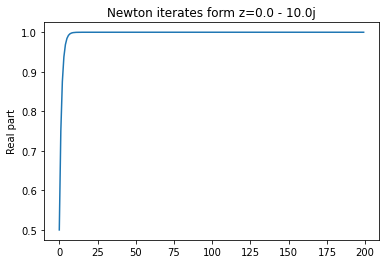

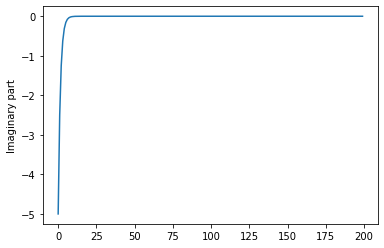

In [48]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2*z-2

z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z=0.0 + 0.0j

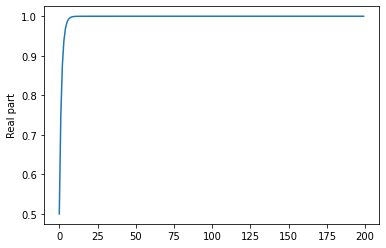

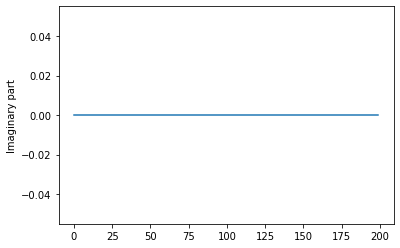

In [49]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##Se concluye lo siguiente:

- Iteración 1: Converge al punto 1 debido a que su única raíz es 1. Imaginaria converge a 0 ya que no hay raices imaginarias.
- Iteración 2: Converge al punto 1 debido a que su única raíz es 1. Imaginaria converge a 0 ya que no hay raices imaginarias.
- Iteración 3: Converge al punto 1 debido a que su única raíz es 1. Imaginaria converge a 0 ya que no hay raices imaginarias.
- Iteración 4: Converge al punto 1 debido a que su única raíz es 1. Imaginaria converge a 0 ya que no hay raices imaginarias.
- Iteración 5: Converge al punto 1 debido a que su única raíz es 1. Imaginaria converge a 0 ya que no hay raices imaginarias.

##z^2 - 1
###Newton iterates form z=10.0 + 0.0j

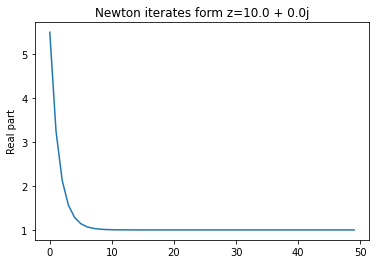

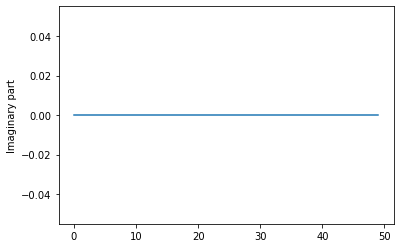

In [50]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = -10.0 + 0.0j

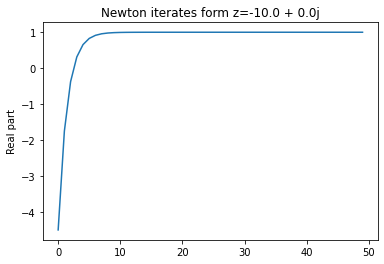

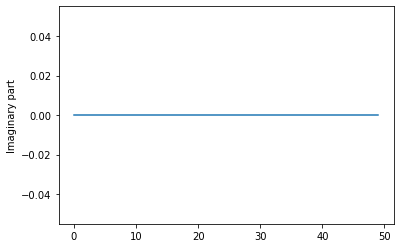

In [51]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = 0.0 + 10.0j

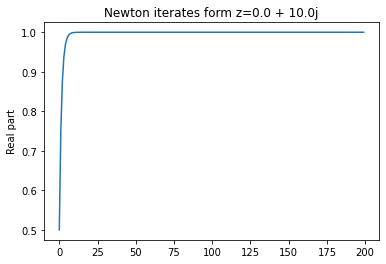

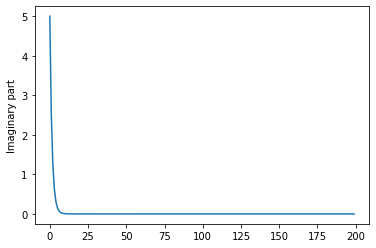

In [52]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z=0.0 - 10.0j

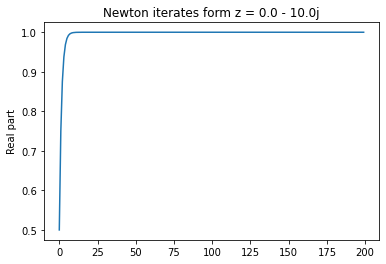

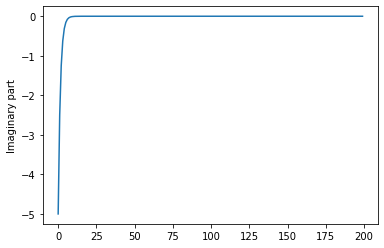

In [54]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = 0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = 0.0 + 0.0j

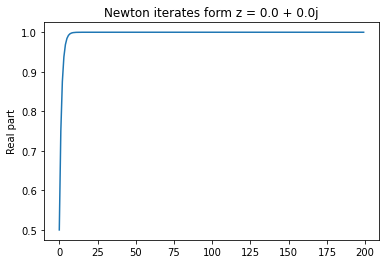

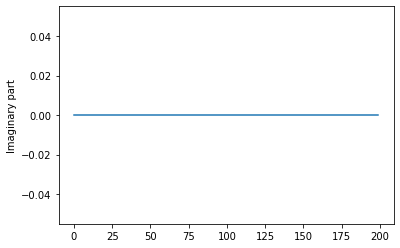

In [57]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = 0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##Se concluye lo siguiente:

- Iteración 1: Primera raíz tiende a 1 usando Newton debido a que la posición está en los reales positivos.
- Iteración 2: Primera raíz tiende a -1 usando Newton debido a que la posición está en los reales negativos.
- Iteración 3: Imaginaria no tiende a raíz ya que no hay raices imaginarias.
- Iteración 4: Imaginaria no tiende a raíz ya que no hay raices imaginarias.

##z^2 + 1
###Newton iterates form z=10.0 + 0.0j

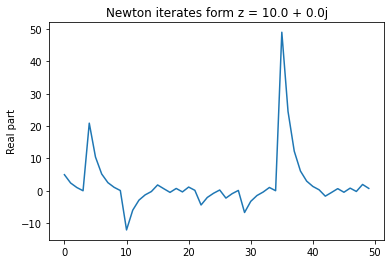

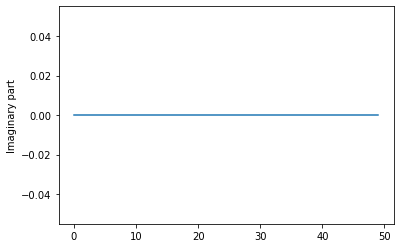

In [59]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = 10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = -10.0 + 0.0j

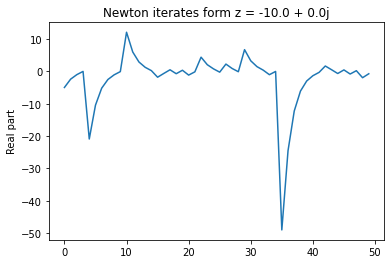

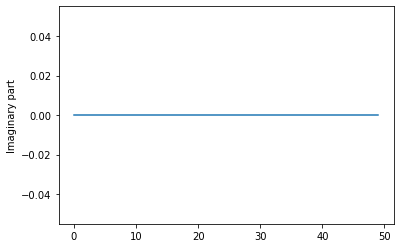

In [61]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = -10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z = 0.0 + 10.0j

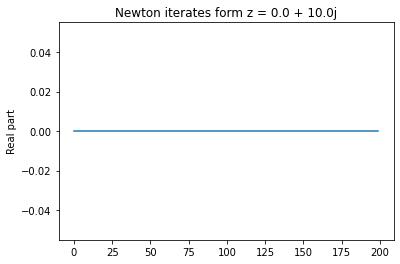

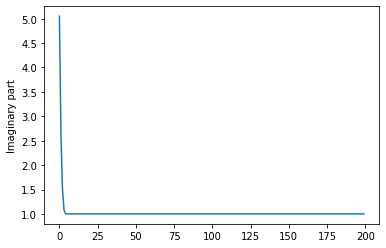

In [62]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = 0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()



###Newton iterates form z = 0.0 - 10.0j

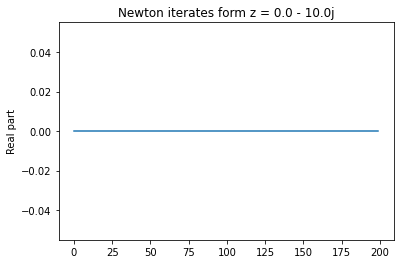

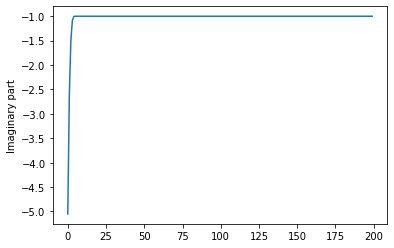

In [64]:
def f(z):
    return z**2 + 1

def df(z):
    return 2*z

z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z = 0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Newton iterates form z=0.0 + 0.0j

In [65]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

##Se concluye lo siguiente:

- Iteración 1: Debido a que la función no tiene raices en los reales; no es claro a donde diverge la parte real durante las 50 repeticiones. 
- Iteración 2: Debido a que la función no tiene raices en los reales; no es claro a donde diverge la parte real durante las 50 repeticiones. 
- Iteración 3: Si se situa en el eje imaginario la función tiende a ir a -i e i como se ve en el punto 2.
- Iteración 4: Si se situa en el eje imaginario la función tiende a ir a -i e i como se ve en el punto 2.